In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('neo.csv')

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,20.09,True


In [4]:
df.shape

(90836, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90836 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 4.9+ MB


In [6]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346432,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020648,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604635,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128100,7.479865e+07,33.200000


In [7]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

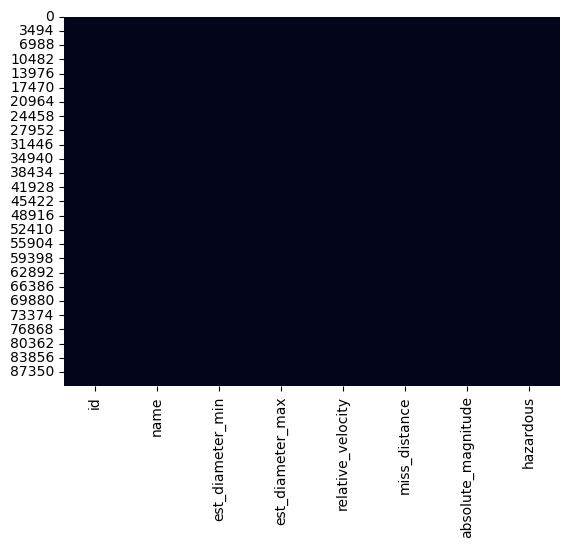

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [9]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object

In [10]:
df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90785
miss_distance         90536
absolute_magnitude     1638
hazardous                 2
dtype: int64

## EDA

### Visualization of Asteroid Sizes

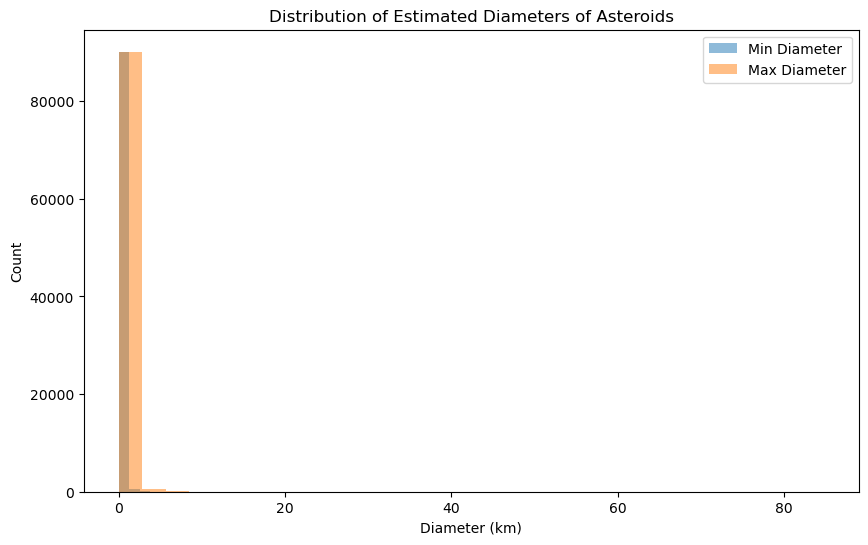

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['est_diameter_min'], bins=30, alpha=0.5, label='Min Diameter')
plt.hist(df['est_diameter_max'], bins=30, alpha=0.5, label='Max Diameter')
plt.xlabel('Diameter (km)')
plt.ylabel('Count')
plt.title('Distribution of Estimated Diameters of Asteroids')
plt.legend()
plt.show()

### Visualizing Relative Velocity

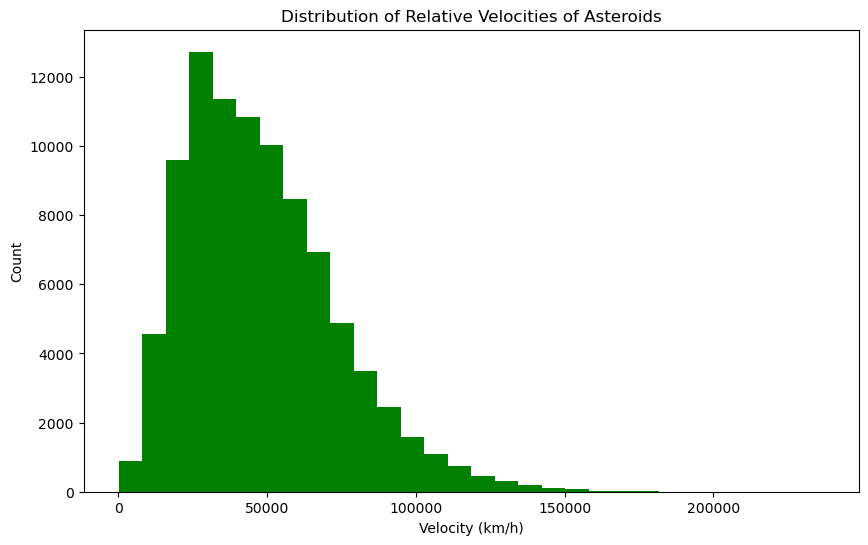

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['relative_velocity'], bins=30, color='green')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Count')
plt.title('Distribution of Relative Velocities of Asteroids')
plt.show()

### Miss Distance Visualization

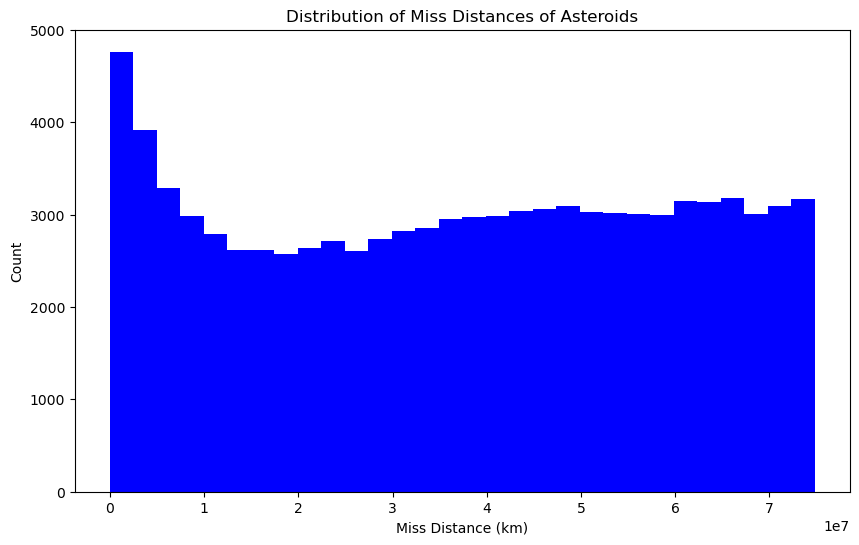

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['miss_distance'], bins=30, color='blue')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Count')
plt.title('Distribution of Miss Distances of Asteroids')
plt.show()

### Hazardous Status

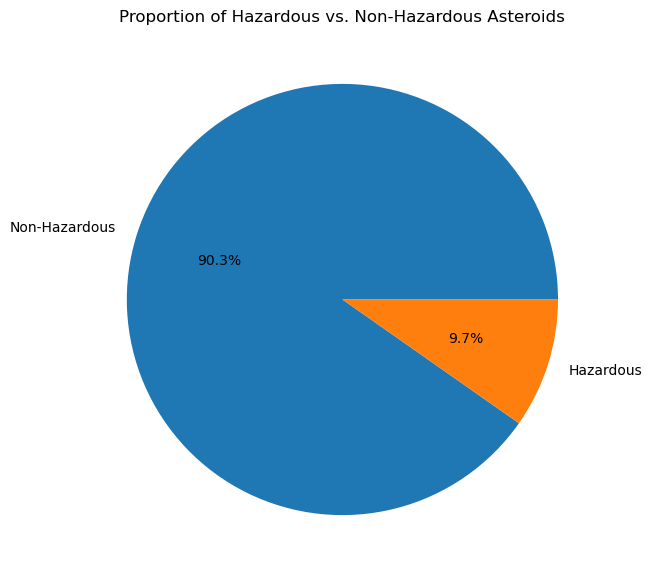

In [14]:
hazardous_counts = df['hazardous'].value_counts()
plt.figure(figsize=(7, 7))
hazardous_counts.plot(kind='pie', labels=['Non-Hazardous', 'Hazardous'], autopct='%1.1f%%')
plt.ylabel('')
plt.title('Proportion of Hazardous vs. Non-Hazardous Asteroids')
plt.show()

In [15]:
df_Hazardous = df['hazardous'].value_counts()
print(df_Hazardous)

hazardous
False    81996
True      8840
Name: count, dtype: int64


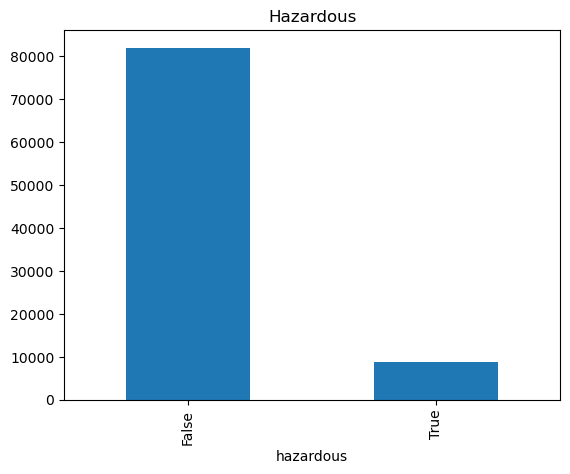

In [16]:
df.hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()

In [17]:
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346432,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020648,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604635,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128100,7.479865e+07,33.200000


D:\Softwares\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


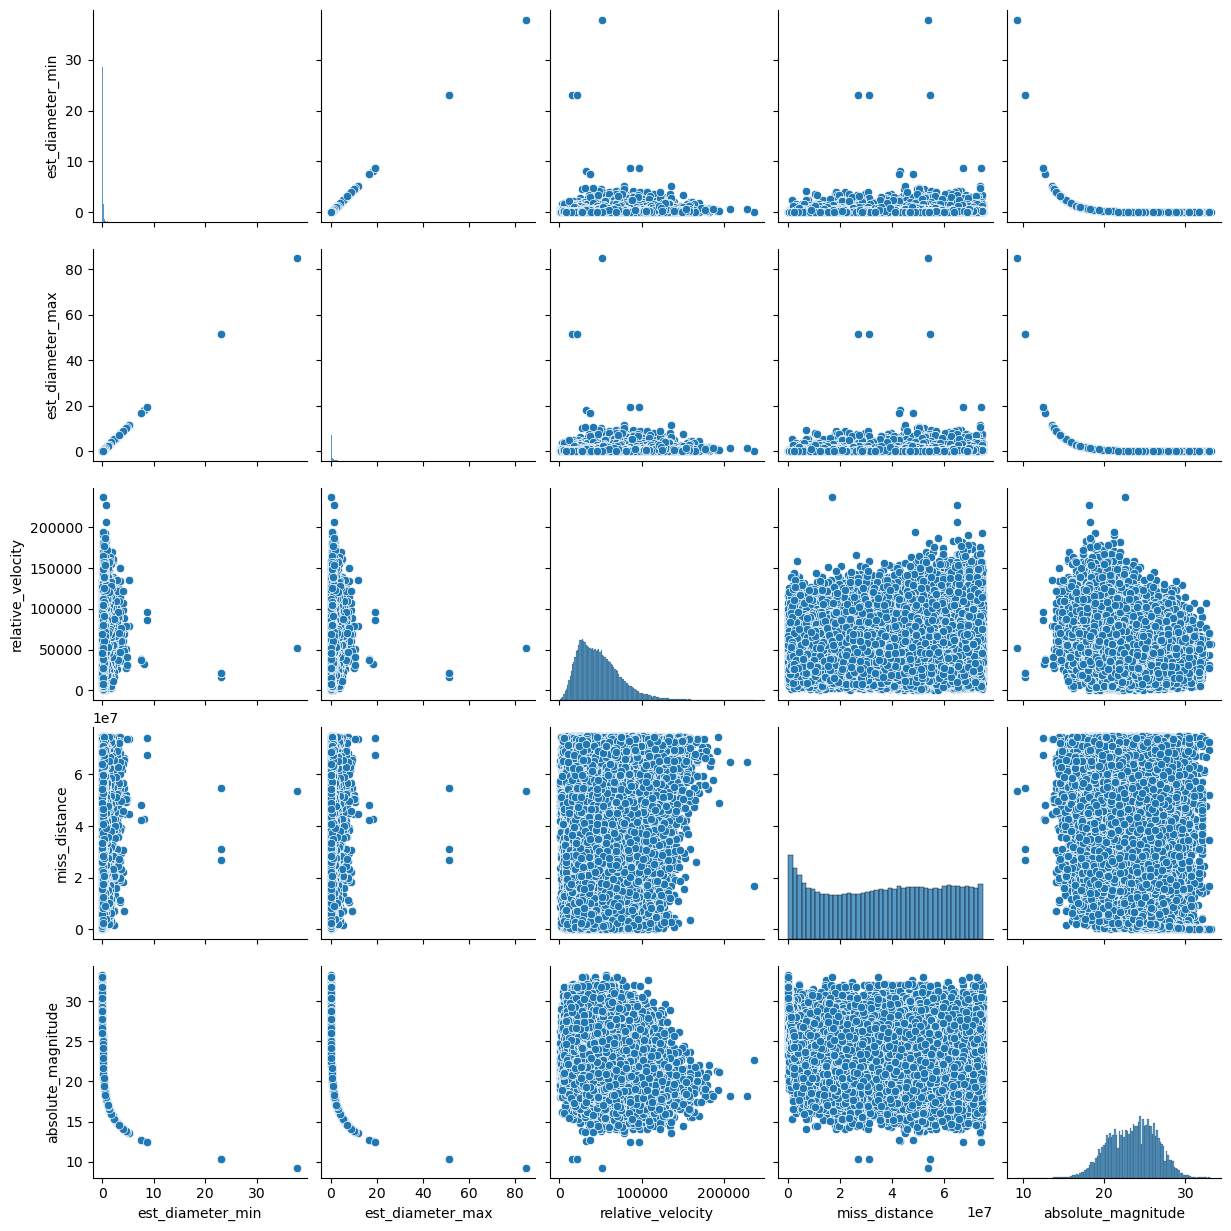

In [18]:
# create pairplot To plot multiple pairwise bivariate distributions in a dataset
fig= sns.pairplot(df[numeric_df])

D:\Softwares\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


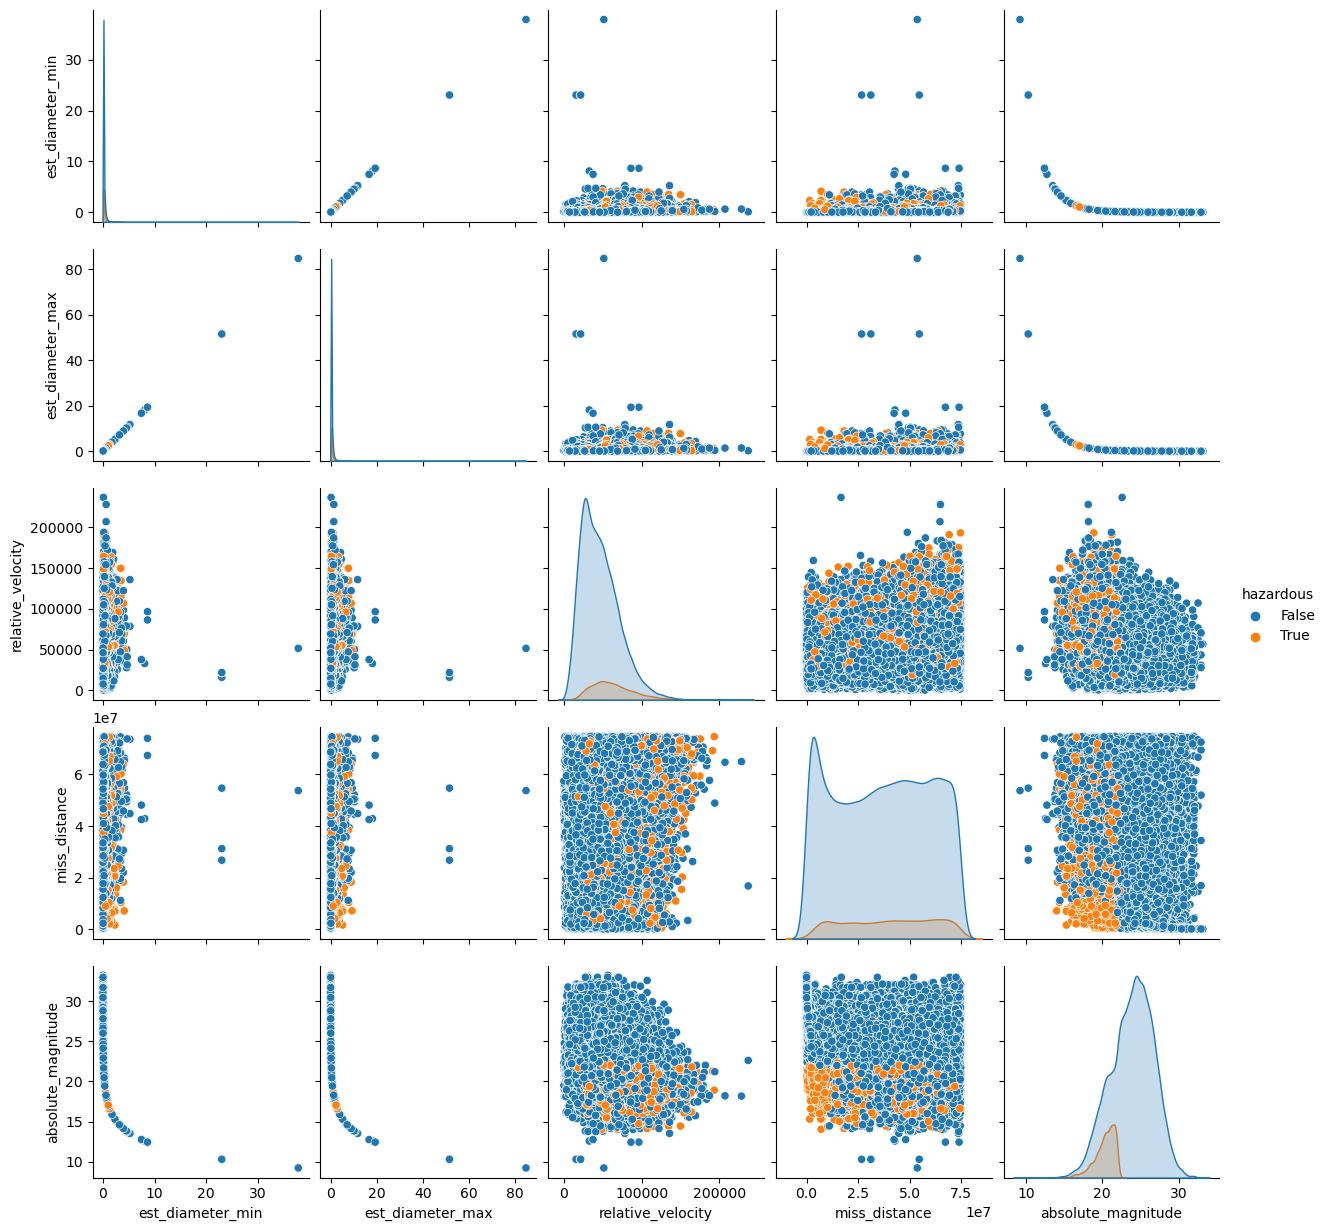

In [19]:
# create pairplot To plot multiple pairwise bivariate distributions with hazardous
fig= sns.pairplot(df[numeric_df+['hazardous']],hue = 'hazardous')

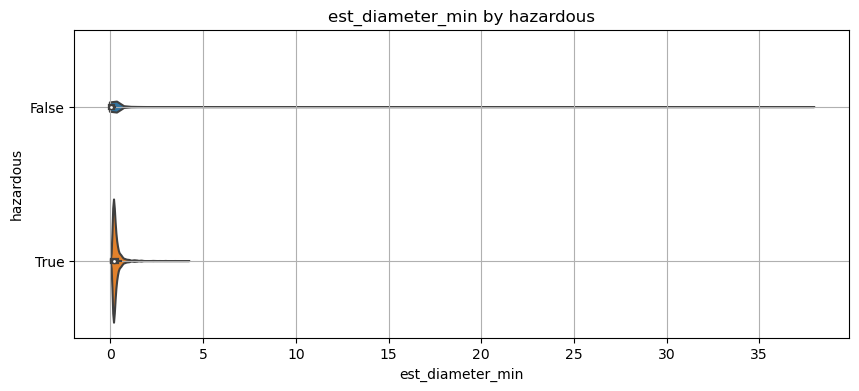

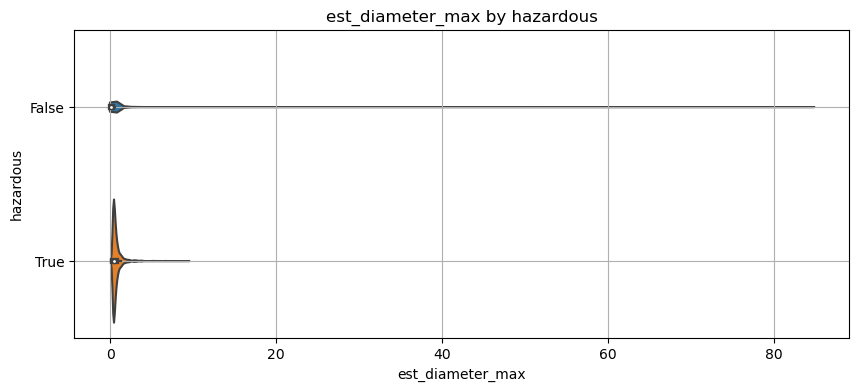

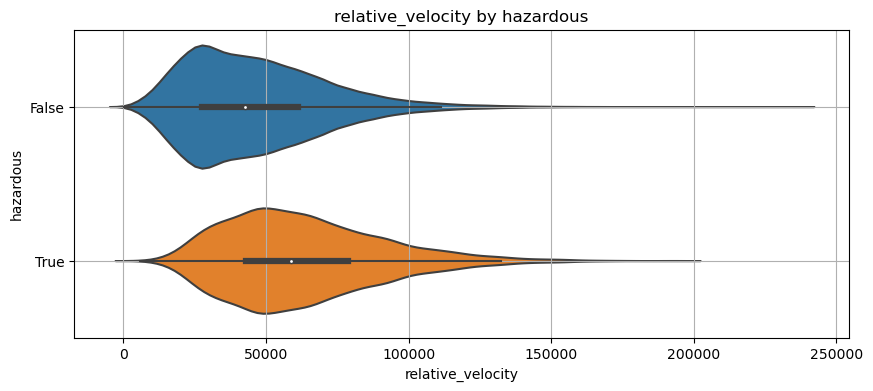

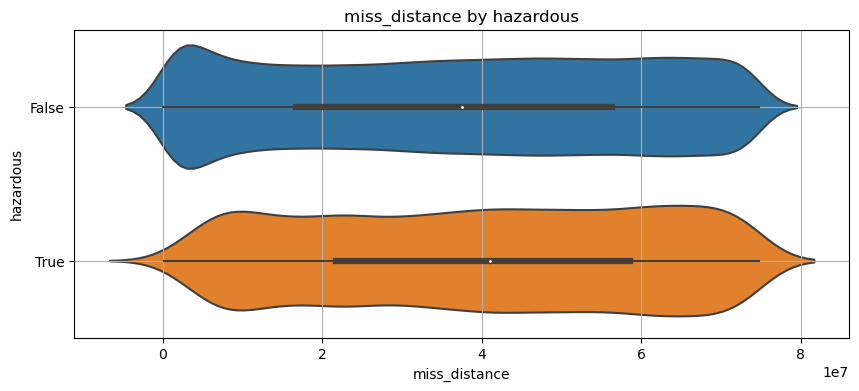

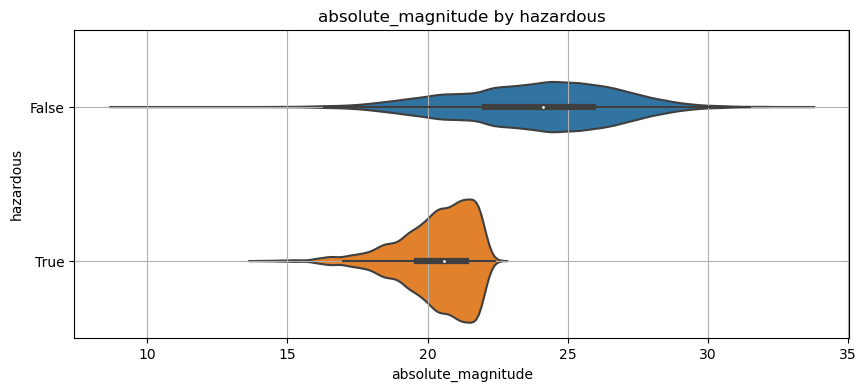

In [20]:
for k in numeric_df:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df, x=k, y='hazardous', orient='h')
    title = k + ' by hazardous'
    plt.title(title)
    plt.grid()

In [21]:
df = df.drop(['id', 'name'], axis=1)

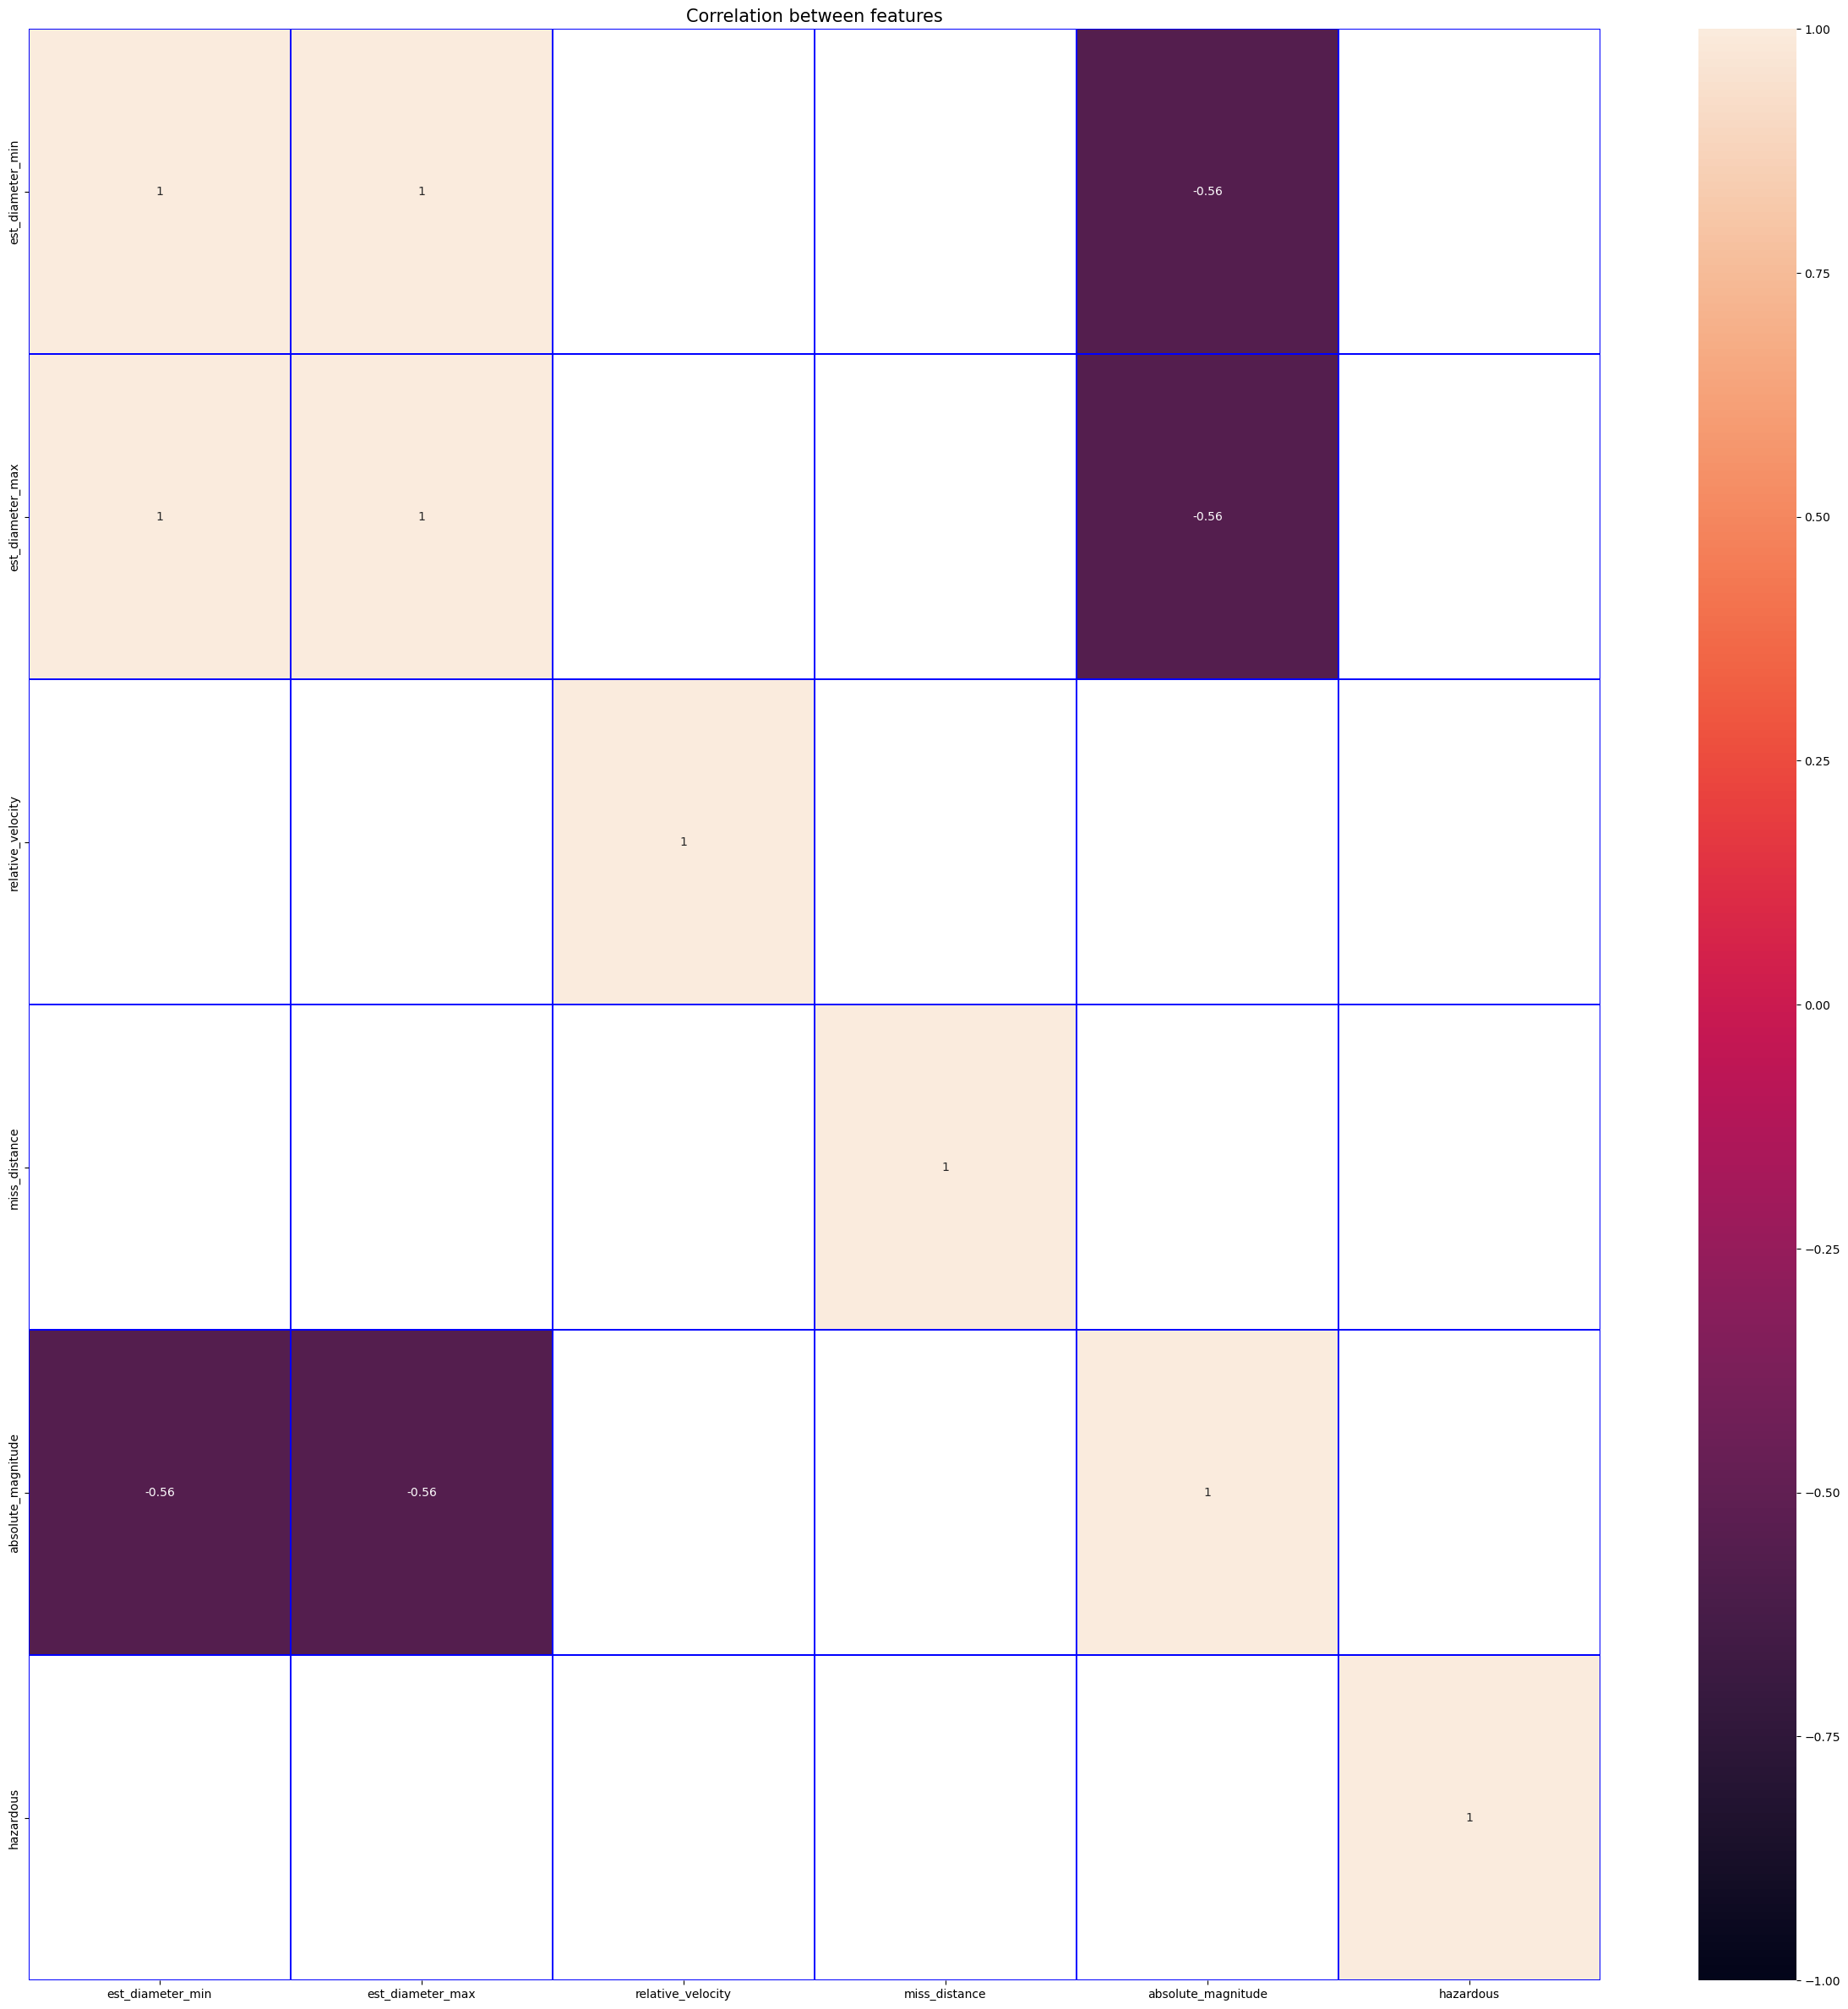

In [22]:
correlation=df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.show()

### Multicollinearity Check

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop non-numeric columns (if any)
numeric_data = df.drop(['hazardous'], axis=1)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

print(vif_data)

             Variable       VIF
0    est_diameter_min       inf
1    est_diameter_max       inf
2   relative_velocity  4.977891
3       miss_distance  4.071917
4  absolute_magnitude  4.679218


D:\Softwares\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


##### est_diameter_min and est_diameter_max:
The perfect correlation between these two variables indicates that they provide the same information to the model. Including both in the model leads to redundancy and can cause numerical instabilible..

##### relative_velocity, miss_distance, absolute_magnitude:These variables have high VIF values, indicating a strong correlation among them. This can make it challenging for the model to distinguish the unique contribution of each variable..

In [25]:
X = df.drop(['est_diameter_min', 'hazardous'], axis=1)
y = df['hazardous']

### Model Training

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Models Without Scaling

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### XG Boost Model

In [32]:
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)
XGBC_pred = XGBC.predict(X_test)
Acc_XGBC = round(accuracy_score(XGBC_pred, y_test) * 100,2)
print(Acc_XGBC)

91.45


In [33]:
XGBC_report = classification_report(y_test, XGBC_pred, target_names=['Class 0', 'Class 1'])
print("XGBoost Classification Report:\n", XGBC_report)

XGBoost Classification Report:
               precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95     16373
     Class 1       0.68      0.25      0.37      1795

    accuracy                           0.91     18168
   macro avg       0.80      0.62      0.66     18168
weighted avg       0.90      0.91      0.90     18168



#### KNN Model

In [34]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
Acc_KNN = round(accuracy_score(KNN_pred, y_test) * 100, 2)
print(Acc_KNN)

88.06


In [35]:
KNN_report = classification_report(y_test, KNN_pred, target_names=['Class 0', 'Class 1'])
print("\nKNN Classification Report:\n", KNN_report)


KNN Classification Report:
               precision    recall  f1-score   support

     Class 0       0.91      0.97      0.94     16373
     Class 1       0.22      0.08      0.12      1795

    accuracy                           0.88     18168
   macro avg       0.56      0.52      0.53     18168
weighted avg       0.84      0.88      0.86     18168



#### RandomForst Model

In [36]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
Acc_RF = round(accuracy_score(RF_pred, y_test) * 100, 2)
print(Acc_RF)

91.67


In [37]:
RF_report = classification_report(y_test, RF_pred, target_names=['Class 0', 'Class 1'])
print("\nRandomForest Classification Report:\n", RF_report)


RandomForest Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.98      0.95     16373
     Class 1       0.63      0.38      0.48      1795

    accuracy                           0.92     18168
   macro avg       0.78      0.68      0.72     18168
weighted avg       0.90      0.92      0.91     18168



#### DecisionTree Model

In [38]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)
Acc_DTC = round(accuracy_score(DTC_pred, y_test) * 100, 2)
print(Acc_DTC)

89.28


In [39]:
DTC_report = classification_report(y_test, DTC_pred, target_names=['Class 0', 'Class 1'])
print("\nDecisionTree Classification Report:\n", DTC_report)


DecisionTree Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94     16373
     Class 1       0.46      0.46      0.46      1795

    accuracy                           0.89     18168
   macro avg       0.70      0.70      0.70     18168
weighted avg       0.89      0.89      0.89     18168



### Table for all the models

In [40]:
# Print all models

models = pd.DataFrame({
    'Model': ['Random Forest', 'XG Boost', 
              'KNeighborsClassifier', 'DecisionTreeClassifier'],
    'Score': [Acc_RF, Acc_XGBC, 
              Acc_KNN, Acc_DTC]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,91.67
1,XG Boost,91.45
3,DecisionTreeClassifier,89.28
2,KNeighborsClassifier,88.06


In [41]:
from tabulate import tabulate

# Create a table
table = [["XGBoost", Acc_XGBC, XGBC_report],
         ["KNN", Acc_KNN, KNN_report],
         ["RandomForest", Acc_RF, RF_report],
         ["DecisionTree", Acc_DTC, DTC_report]]

# Print the table
headers = ["Model", "Accuracy", "Classification Report"]
print(tabulate(table, headers, tablefmt="grid"))

+--------------+------------+-------------------------------------------------------+
| Model        |   Accuracy | Classification Report                                 |
+==============+============+=======================================================+
| XGBoost      |      91.45 | precision    recall  f1-score   support               |
|              |            |                                                       |
|              |            |      Class 0       0.92      0.99      0.95     16373 |
|              |            |      Class 1       0.68      0.25      0.37      1795 |
|              |            |                                                       |
|              |            |     accuracy                           0.91     18168 |
|              |            |    macro avg       0.80      0.62      0.66     18168 |
|              |            | weighted avg       0.90      0.91      0.90     18168 |
+--------------+------------+-------------------------

Conclusion - Random Forest appears to be the best-performing model overall, considering accuracy and other classification metrics.

### Min-Max Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
XGB = XGBClassifier()
XGB.fit(x_train, Y_train)
XGB_pred = XGB.predict(X_test)
Acc_XGB = round(accuracy_score(XGB_pred, Y_test) * 100,2)
print(Acc_XGB)

91.63


In [46]:
XGB_report = classification_report(Y_test, XGB_pred, target_names=['Class 0', 'Class 1'])
print("XGBoost Classification Report:\n", XGB_report)

XGBoost Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96     16439
     Class 1       0.67      0.24      0.35      1729

    accuracy                           0.92     18168
   macro avg       0.80      0.61      0.65     18168
weighted avg       0.90      0.92      0.90     18168



In [47]:
KN = KNeighborsClassifier(n_neighbors = 3)
KN.fit(x_train, Y_train)
KN_pred = KNN.predict(x_test)
Acc_KN = round(accuracy_score(KN_pred, Y_test) * 100, 2)
print(Acc_KN)

90.48


In [48]:
KN_report = classification_report(Y_test, KN_pred, target_names=['Class 0', 'Class 1'])
print("\nKNN Classification Report:\n", KN_report)


KNN Classification Report:
               precision    recall  f1-score   support

     Class 0       0.90      1.00      0.95     16439
     Class 1       0.00      0.00      0.00      1729

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.48     18168
weighted avg       0.82      0.90      0.86     18168



D:\Softwares\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
RFC = RandomForestClassifier()
RFC.fit(x_train, Y_train)
RFC_pred = RFC.predict(x_test)
Acc_RFC = round(accuracy_score(RFC_pred, Y_test) * 100, 2)
print(Acc_RFC)

91.94


In [50]:
RFC_report = classification_report(Y_test, RFC_pred, target_names=['Class 0', 'Class 1'])
print("\nRandomForest Classification Report:\n", RFC_report)


RandomForest Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.97      0.96     16439
     Class 1       0.62      0.40      0.49      1729

    accuracy                           0.92     18168
   macro avg       0.78      0.69      0.72     18168
weighted avg       0.91      0.92      0.91     18168



In [51]:
DT = DecisionTreeClassifier()
DT.fit(x_train, Y_train)
DT_pred = DT.predict(x_test)
Acc_DT = round(accuracy_score(DT_pred, Y_test) * 100, 2)
print(Acc_DT)

89.21


In [54]:
DT_report = classification_report(Y_test, DT_pred, target_names=['Class 0', 'Class 1'])
print("\nDecisionTree Classification Report:\n", DT_report)


DecisionTree Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94     16439
     Class 1       0.44      0.48      0.46      1729

    accuracy                           0.89     18168
   macro avg       0.69      0.71      0.70     18168
weighted avg       0.90      0.89      0.89     18168



In [55]:
from tabulate import tabulate

# Create a table
table = [["XGBoost", Acc_XGB, XGB_report],
         ["KNN", Acc_KN, KN_report],
         ["RandomForest", Acc_RFC, RFC_report],
         ["DecisionTree", Acc_DT, DT_report]]

# Print the table
headers = ["Model", "Accuracy", "Classification Report"]
print(tabulate(table, headers, tablefmt="grid"))

+--------------+------------+-------------------------------------------------------+
| Model        |   Accuracy | Classification Report                                 |
+==============+============+=======================================================+
| XGBoost      |      91.63 | precision    recall  f1-score   support               |
|              |            |                                                       |
|              |            |      Class 0       0.93      0.99      0.96     16439 |
|              |            |      Class 1       0.67      0.24      0.35      1729 |
|              |            |                                                       |
|              |            |     accuracy                           0.92     18168 |
|              |            |    macro avg       0.80      0.61      0.65     18168 |
|              |            | weighted avg       0.90      0.92      0.90     18168 |
+--------------+------------+-------------------------

### OverSampling And UnderSampling

In [62]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [63]:
# Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)



In [64]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    return accuracy, precision, recall, f1

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_results = evaluate_model(dt_model, X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_results = evaluate_model(rf_model, X_test, y_test)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_results = evaluate_model(xgb_model, X_test, y_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_results = evaluate_model(knn_model, X_test, y_test)

# Evaluate oversampled and upsampled models
dt_results_ros = evaluate_model(dt_model, X_ros, y_ros)
rf_results_ros = evaluate_model(rf_model, X_ros, y_ros)
xgb_results_ros = evaluate_model(xgb_model, X_ros, y_ros)
knn_results_ros = evaluate_model(knn_model, X_ros, y_ros)

dt_results_rus = evaluate_model(dt_model, X_rus, y_rus)
rf_results_rus = evaluate_model(rf_model, X_rus, y_rus)
xgb_results_rus = evaluate_model(xgb_model, X_rus, y_rus)
knn_results_rus = evaluate_model(knn_model, X_rus, y_rus)



In [65]:
results_table = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'KNN'],
    'Original Data Accuracy': [dt_results[0], rf_results[0], xgb_results[0], knn_results[0]],
    'ROS Accuracy': [dt_results_ros[0], rf_results_ros[0], xgb_results_ros[0], knn_results_ros[0]],
    'RUS Accuracy': [dt_results_rus[0], rf_results_rus[0], xgb_results_rus[0], knn_results_rus[0]],
})

print(results_table)


           Model  Original Data Accuracy  ROS Accuracy  RUS Accuracy
0  Decision Tree                0.890852      1.000000      1.000000
1  Random Forest                0.920244      1.000000      1.000000
2        XGBoost                0.916281      0.658351      0.657643
3            KNN                0.899163      0.717681      0.716003
